In [ ]:
import networkx as nx
import numpy as np
import random as rd
import matplotlib.pyplot as plt

# barabasi albert model

def power_law(graph, scale='lin', colour='#40a6d1', alpha=.8, fit_line=False, expct_lo=1, expct_hi=10, expct_const=1):
    
    num_nodes = graph.number_of_nodes()
    max_degree = 0
    for n in graph.nodes():
        if graph.degree(n) > max_degree:
            max_degree = graph.degree(n)
    
    x = []
    y_tmp = []
    
    for i in range(max_degree + 1):
        x.append(i)
        y_tmp.append(0)
        for n in graph.nodes():
            if graph.degree(n) == i:
                y_tmp[i] += 1
        y = [i / num_nodes for i in y_tmp] 
    
    if scale == 'log':
        plt.xscale('log')
        plt.yscale('log')
        plt.title('Degree distribution (log-log scale)')
        plt.ylabel('log(P(k))')
        plt.xlabel('log(k)')
        plt.plot(x, y, linewidth = 0, marker = 'o', markersize = 8, color = colour, alpha = alpha)
        
        if fit_line:
            w = [a for a in range(expct_lo,expct_hi)]
            z = []
            for i in w:
                x = (i**-3) * expct_const
                z.append(x)

            plt.plot(w, z, 'k-', color='#7f7f7f')
            
    else:
        plt.plot(x, y, linewidth = 0, marker = 'o', markersize = 8, color = colour, alpha = alpha)
        plt.title('Degree distribution (linear scale)')
        plt.ylabel('P(k)')
        plt.xlabel('k')

    plt.show()

def random_selection_of_nodes():
    nodes_prob = []
    for node in G.nodes():
        node_degree = G.degree(node)
        node_prob = node_degree / (2 * len(G.edges()))
        nodes_prob.append(node_prob)
    random_probability = np.random.choice(G.nodes(),p=nodes_prob)
    return random_probability

def add_edge():
        if len(G.edges()) == 0:
            random_probability = 0
        else:
            random_probability = random_selection_of_nodes()
        new_edge = (random_probability, new_node)
        if new_edge in G.edges():
            add_edge()
        else:
            G.add_edge(new_node, random_probability)

n_0 = 2
n = 120
m = 2

G = nx.complete_graph(n_0)

count = 0
new_node = n_0

for f in range(n - n_0):
    G.add_node(n_0 + count)
    count += 1
    for e in range(0, m):
        add_edge()
    new_node += 1


In [13]:
from netgraph import Graph

c:\Users\Deepa\AppData\Local\Programs\Python\Python310\lib\site-packages\netgraph\_node_layout.py:1024: RuntimeWarning: invalid value encountered in divide
  directions = deltas / magnitudes[:, np.newaxis]
c:\Users\Deepa\AppData\Local\Programs\Python\Python310\lib\site-packages\netgraph\_utils.py:360: RuntimeWarning: invalid value encountered in divide
  v = v / np.linalg.norm(v, axis=-1)[:, None] # unit vector


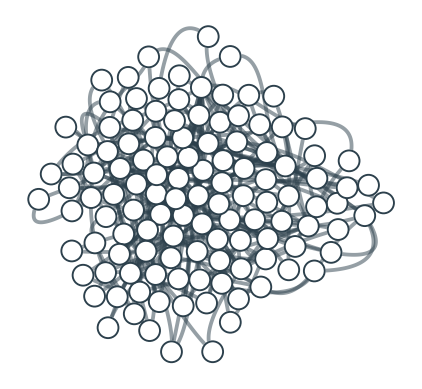

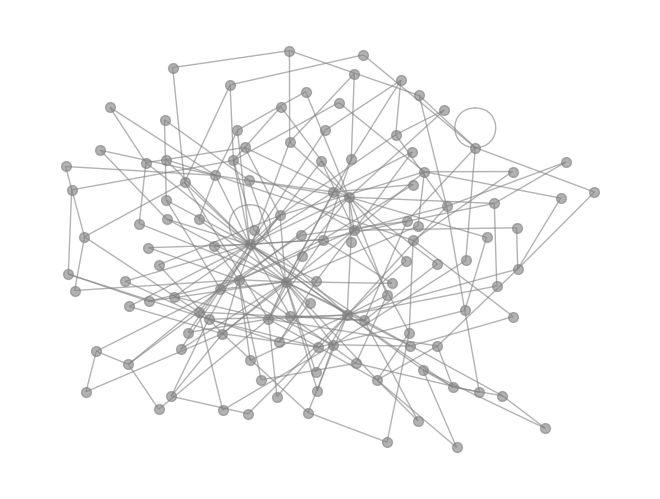

In [19]:
Graph(G, edge_layout='curved') # this makes the lines curvedd
plt.show()

nx.draw(G, node_size=50,  alpha=0.6, node_color="#808080", edge_color="#808080") # not curved

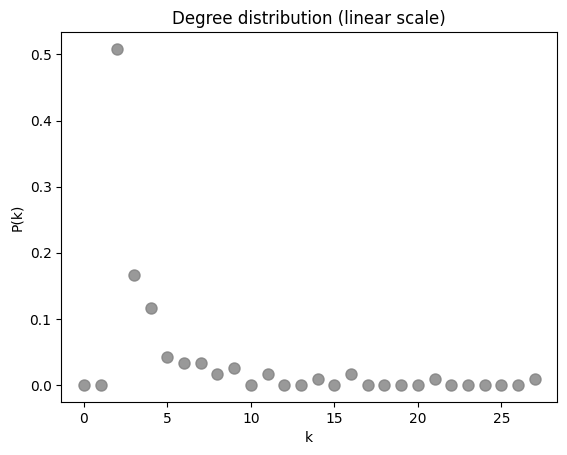

In [20]:
power_law(graph=G, colour='#808080', alpha=.8)

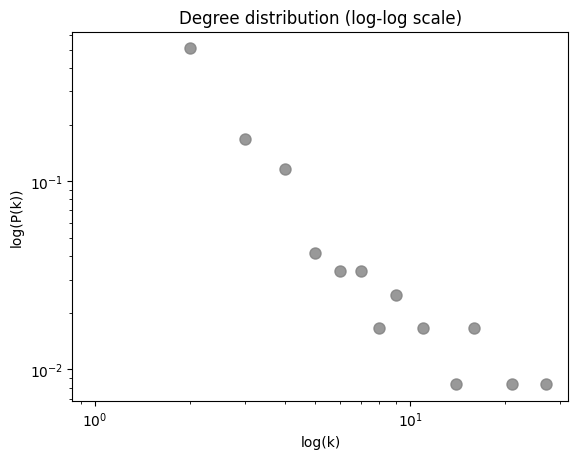

In [21]:
power_law(graph=G, colour='#808080', scale='log', alpha=.8)

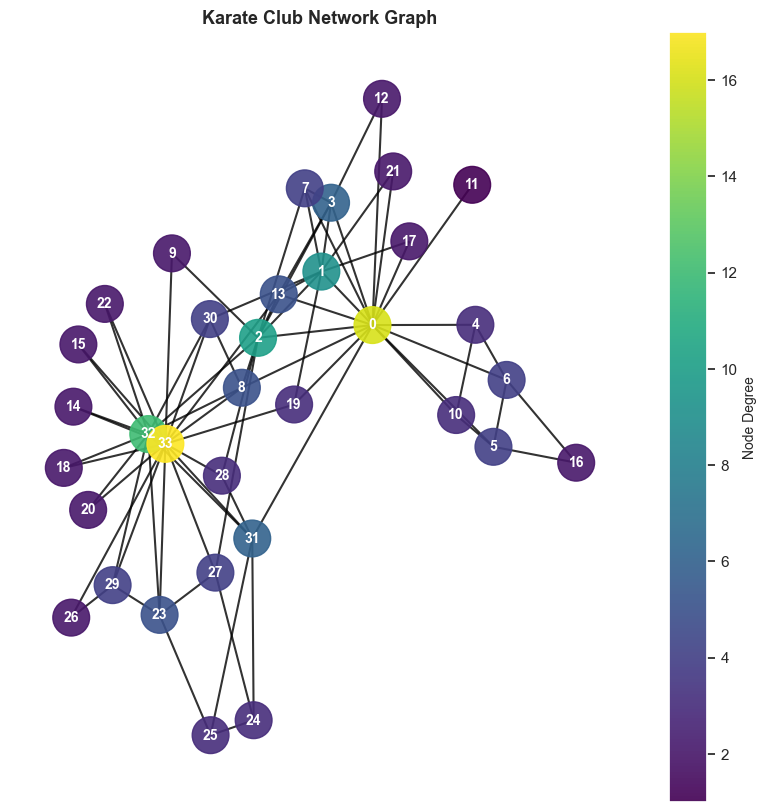

In [ ]:
# zachary karate

N = 78
edges = [
    (2, 1), (3, 1), (3, 2), (4, 1), (4, 2), (4, 3), (5, 1), (6, 1), (7, 1), (7, 5), (7, 6), 
    (8, 1), (8, 2), (8, 3), (8, 4), (9, 1), (9, 3), (10, 3), (11, 1), (11, 5), (11, 6), (12, 1), 
    (13, 1), (13, 4), (14, 1), (14, 2), (14, 3), (14, 4), (17, 6), (17, 7), (18, 1), (18, 2), 
    (20, 1), (20, 2), (22, 1), (22, 2), (26, 24), (26, 25), (28, 3), (28, 24), (28, 25), 
    (29, 3), (30, 24), (30, 27), (31, 2), (31, 9), (32, 1), (32, 25), (32, 26), (32, 29), 
    (33, 3), (33, 9), (33, 15), (33, 16), (33, 19), (33, 21), (33, 23), (33, 24), (33, 30), 
    (33, 31), (33, 32), (34, 9), (34, 10), (34, 14), (34, 15), (34, 16), (34, 19), (34, 20), 
    (34, 21), (34, 23), (34, 24), (34, 27), (34, 28), (34, 29), (34, 30), (34, 31), (34, 32), 
    (34, 33)
]

edges = [(u - 1, v - 1) for u, v in edges]

karate_network = nx.Graph()
karate_network.add_edges_from(edges)

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(karate_network, seed=42)
degrees = [karate_network.degree[node] for node in karate_network.nodes()]
nodes = nx.draw_networkx_nodes(
    karate_network, pos, node_size=700, node_color=degrees, cmap=plt.cm.viridis, alpha=0.9
)

nx.draw_networkx_edges(karate_network, pos, alpha=0.8, edge_color="black", width=1.5)
nx.draw_networkx_labels(
    karate_network, pos, font_size=10, font_color="white", font_weight="bold", font_family="sans-serif"
)

cbar = plt.colorbar(nodes)
cbar.set_label('Node Degree', fontsize=10)

plt.title("Karate Club Network Graph", fontsize=13, fontweight="bold")
plt.axis("off")
plt.show()


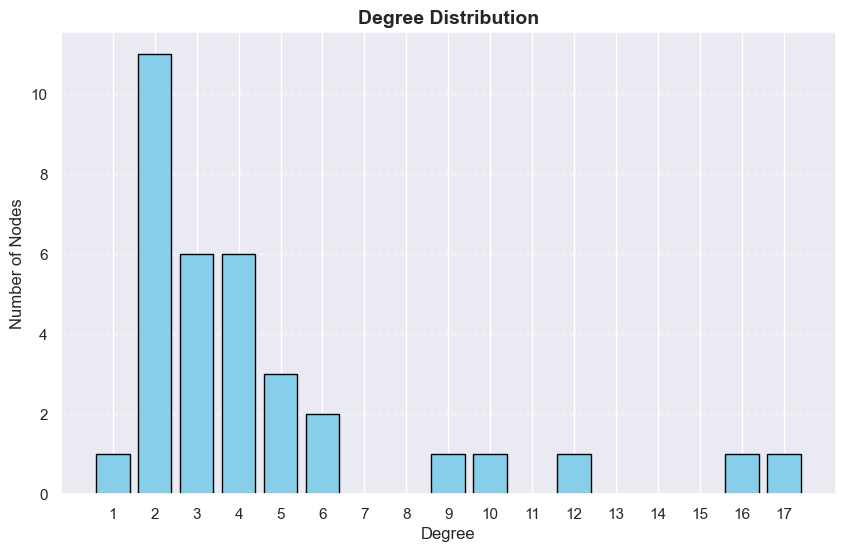

In [186]:
node_degrees = [degree for _, degree in karate_network.degree()]

degree_counts = {}
for degree in node_degrees:
    degree_counts[degree] = degree_counts.get(degree, 0) + 1

sorted_degrees = sorted(degree_counts.items())
x, y = zip(*sorted_degrees)

plt.figure(figsize=(10, 6))
plt.bar(x, y, color="skyblue", edgecolor="black", width=0.8)
plt.xlabel("Degree", fontsize=12)
plt.ylabel("Number of Nodes", fontsize=12)
plt.title("Degree Distribution", fontsize=14, fontweight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(range(min(x), max(x) + 1))
plt.show()
